### Continue after Data Analysis
Here, we will start with buiding a linear regression model to predict what should be the charges for given value of parameter


Also, we will be covering some important topics like process of using <b>Machine learning</b>, using <b>Categorical data</b> in our model, <b>One Hot Encoding</b> and <b>Feature scaling</b>

In [1]:
medical_charges_url = 'https://raw.githubusercontent.com/JovianML/opendatasets/master/data/medical-charges.csv'

In [4]:
from urllib.request import urlretrieve
import pandas as pd
urlretrieve(medical_charges_url, 'medical.csv')
medical_df = pd.read_csv('medical.csv')

In [6]:
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

<AxesSubplot:title={'center':'Age vs Charges'}, xlabel='age', ylabel='charges'>

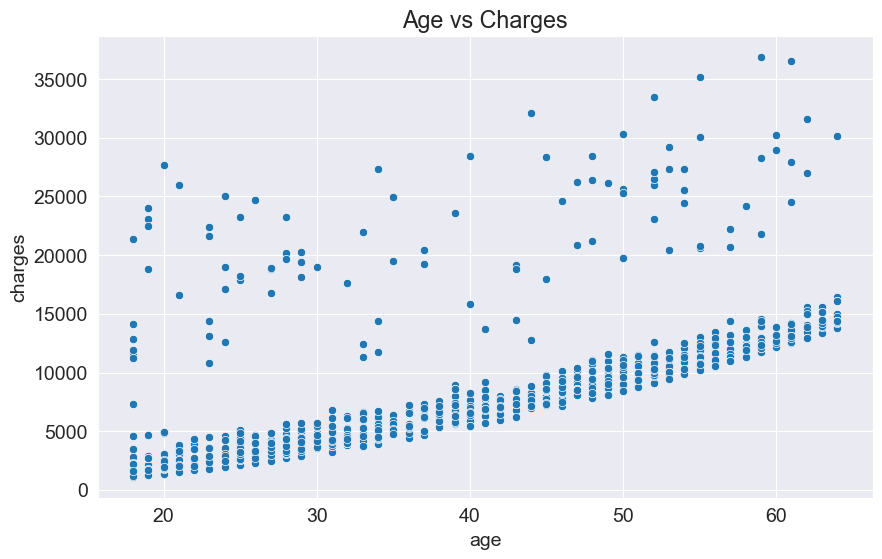

In [14]:
non_smoker_df = medical_df[medical_df.smoker=='no']
plt.title('Age vs Charges')
sns.scatterplot(data = non_smoker_df, x='age', y='charges')

We can see that other than some outliers, most of the points look like they are forming a line, we can try to estimate how this line looks and then we will be able to predict for new age inputs more precisely

In [15]:
def estimate_charge(age, w, b):
    return w*age+b

In [17]:
ages = non_smoker_df.age
estimated_charges = estimate_charge(ages,100,50)

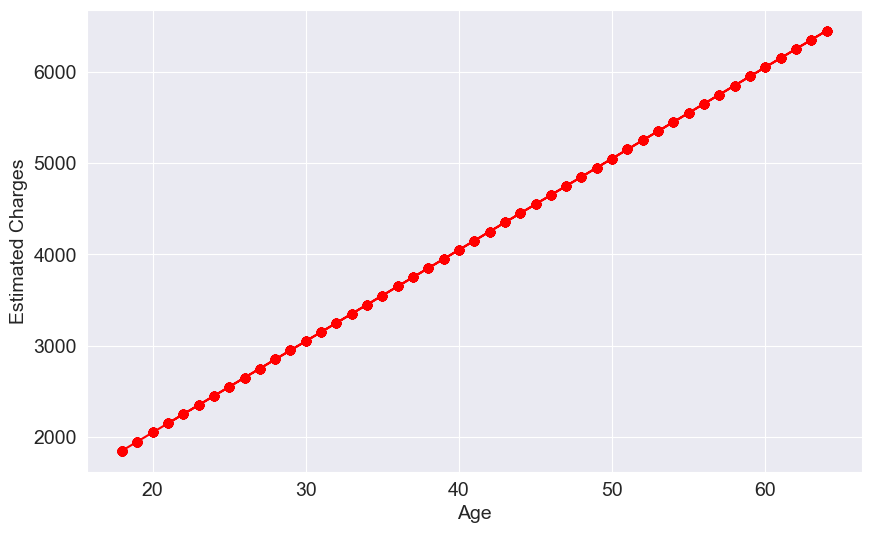

In [18]:
plt.plot(ages, estimated_charges, 'r-o')
plt.xlabel('Age')
plt.ylabel('Estimated Charges')
plt.show()

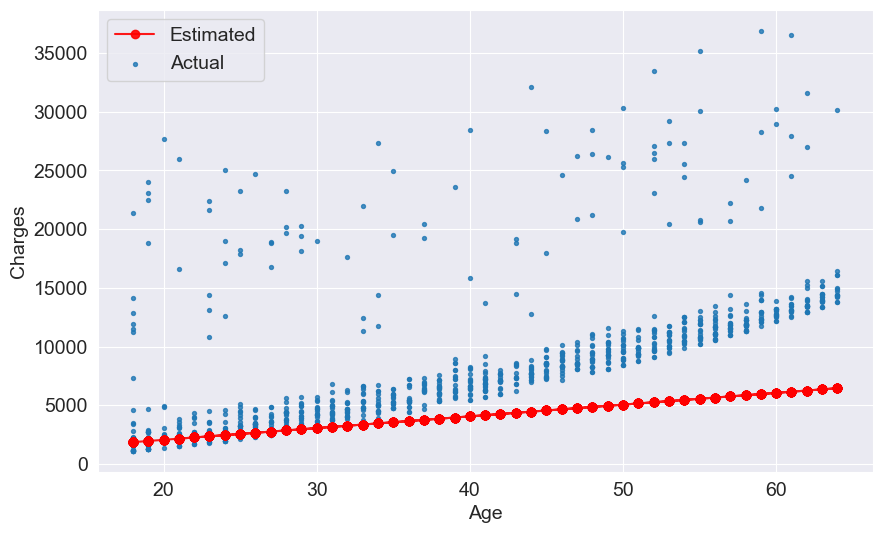

In [31]:
target = non_smoker_df.charges

plt.plot(ages, estimated_charges,'r-o', alpha = 0.9)
plt.scatter(ages, target,s=8, alpha = 0.8)
plt.xlabel('Age')
plt.ylabel('Charges')
plt.legend(['Estimated', 'Actual'])

In [24]:
def try_parameters(w, b):
    
    estimated_charges = estimate_charge(ages, w, b)
    
    plt.plot(ages, estimated_charges, 'r', alpha=0.9);
    plt.scatter(ages, target, s=8,alpha=0.8);
    plt.xlabel('Age');
    plt.ylabel('Charges')
    plt.legend(['Estimate', 'Actual']);

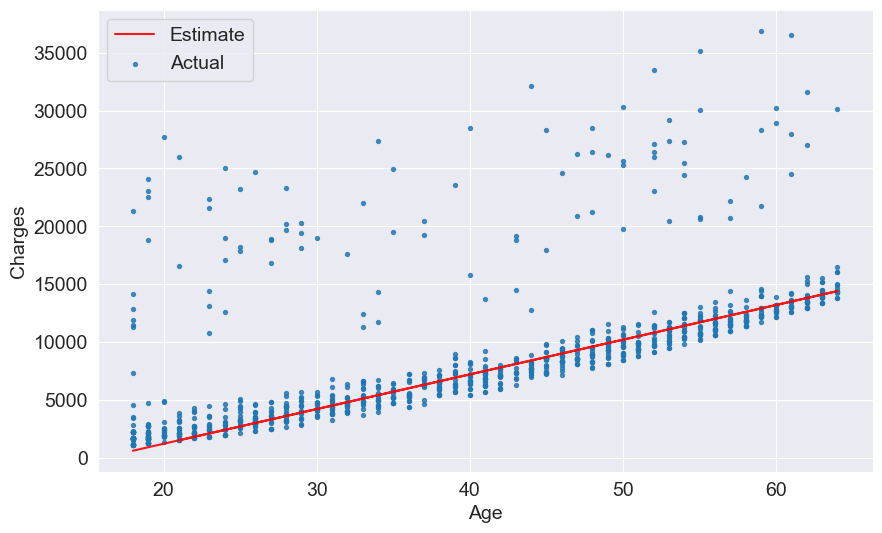

In [41]:
try_parameters(300,-4800)

After running for around 10-12 times using random guessing and then by trying to move it closer, I reached here

### Loss/Cost Function

We can compare our model's predictions with the actual targets using the following method:

* Calculate the difference between the targets and predictions (the differenced is called the "residual")
* Square all elements of the difference matrix to remove negative values.
* Calculate the average of the elements in the resulting matrix.
* Take the square root of the result

The result is a single number, known as the **root mean squared error** (RMSE). The above description can be stated mathematically as follows: 

<img src="https://i.imgur.com/WCanPkA.png" width="360">

Geometrically, the residuals can be visualized as follows:

<img src="https://i.imgur.com/ll3NL80.png" width="420">

Let's define a function to compute the RMSE.

In [50]:
import numpy as np

def rmse(target,pred):
    return np.sqrt(np.mean(np.square(pred-target)))

In [51]:
target = non_smoker_df['charges']
pred = estimate_charge(ages,50,100)

In [52]:
rmse(target,pred)

8461.949562575488

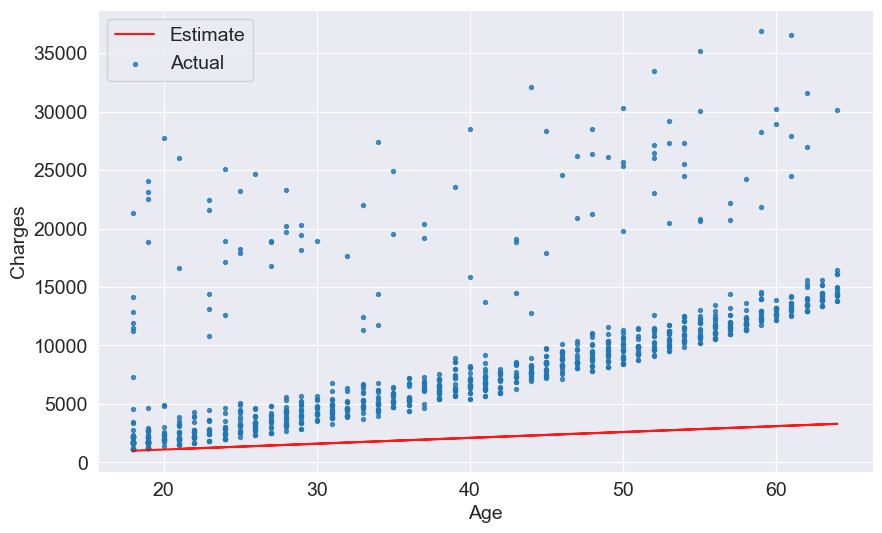

In [53]:
try_parameters(50,100)

### Optimizer

Next, we need a strategy to modify weights `w` and `b` to reduce the loss and improve the "fit" of the line to the data.

* Ordinary Least Squares: https://www.youtube.com/watch?v=szXbuO3bVRk (better for smaller datasets)
* Stochastic gradient descent: https://www.youtube.com/watch?v=sDv4f4s2SB8 (better for larger datasets)

Both of these have the same objective: to minimize the loss, however, while ordinary least squares directly computes the best values for `w` and `b` using matrix operations, while gradient descent uses a iterative approach, starting with a random values of `w` and `b` and slowly improving them using derivatives. 

Here's a visualization of how gradient descent works:

![](https://miro.medium.com/max/1728/1*NO-YvpHHadk5lLxtg4Gfrw.gif)

In [54]:
from sklearn.linear_model import LinearRegression

In [55]:
model = LinearRegression()

In [58]:
inputs = non_smoker_df[['age']]
targets = non_smoker_df.charges
print(inputs.shape)
print(targets.shape)

(1064, 1)
(1064,)


In [59]:
model.fit(inputs, targets)

LinearRegression()

In [61]:
model.predict(np.array([[23],[37],[61]]))

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([ 4055.30443855,  7796.78921819, 14210.76312614])

In [62]:
predictions = model.predict(inputs)

In [63]:
rmse(targets, predictions)

4662.505766636391

In [64]:
print("w: ",model.coef_)
print("b: ",model.intercept_)

w:  [267.24891283]
b:  -2091.4205565650827


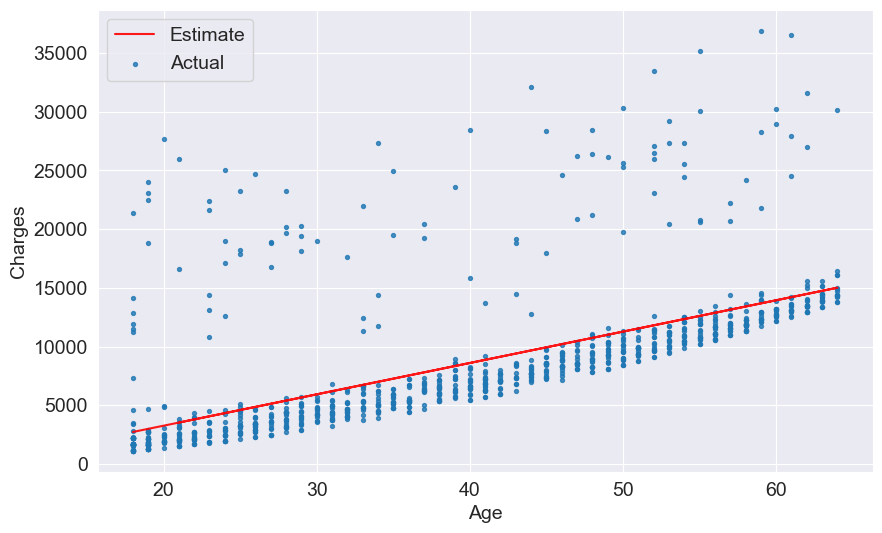

In [65]:
try_parameters(model.coef_, model.intercept_)

LinearRegression class uses ordinary least squares optimization technique internally

In [67]:
from sklearn.linear_model import SGDRegressor

In [68]:
model_SGD = SGDRegressor()

In [70]:
model_SGD.fit(inputs,targets)

SGDRegressor()

In [71]:
predictions_SGD = model_SGD.predict(inputs)

In [72]:
rmse(targets, predictions_SGD)

4733.006362785445

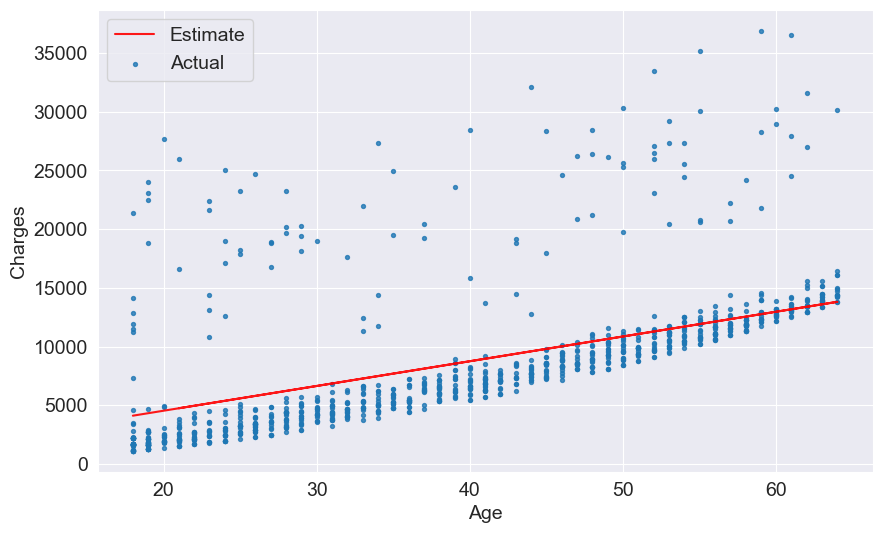

In [73]:
try_parameters(model_SGD.coef_, model_SGD.intercept_)

SGDRegressor class uses stochastic gradient descent optimization technique internally

### Machine Learning

Congratulations, you've just trained your first _machine learning model!_ Machine learning is simply the process of computing the best parameters to model the relationship between some feature and targets. 

Every machine learning problem has three components:

1. **Model**

2. **Cost Function**

3. **Optimizer**

We'll look at several examples of each of the above in future tutorials. Here's how the relationship between these three components can be visualized:

<img src="https://i.imgur.com/oiGQFJ9.png" width="480">

In [76]:
# Create inputs and targets
inputs, targets = non_smoker_df[['age']], non_smoker_df['charges']

# Create and traing the model
model = LinearRegression().fit(inputs,targets)

# Generate Predictions
predictions = model.predict(inputs)

# Compute loss to evaluate the model
loss = rmse(targets,predictions)
print('Loss: ',loss)

Loss:  4662.505766636391


This was the loss when we were using a single feature for estimating the charges, let us now try and use more features and see how does that affect the performance of the model.

$charges = w_1 \times age + w_2 \times bmi + b$

#### Taking Age and BMI

In [92]:
# Create inputs and targets
inputs, targets = non_smoker_df[['age', 'bmi']], non_smoker_df['charges']

# Create and traing the model
model = LinearRegression().fit(inputs,targets)

# Generate Predictions
predictions = model.predict(inputs)

# Compute loss to evaluate the model
loss = rmse(targets,predictions)
print('Loss: ',loss)

Loss:  4662.312835461298


In [93]:
non_smoker_df.charges.corr(non_smoker_df.bmi)

0.08403654312833271

In [94]:
model.coef_, model.intercept_

(array([266.87657817,   7.07547666]), -2293.6320906488672)

In [85]:
px.scatter(non_smoker_df, x = 'bmi', y = 'charges', title = 'BMI vs Charges').update_traces(marker_size=5)


We can clearly see that there is very insignificant difference in loss and that is understandable as the correlation is so low.

In [86]:
px.scatter_3d(non_smoker_df, x='age', y='bmi', z='charges').update_traces(marker_size=3, marker_opacity=0.5)

This plot shows us that it becomes increasingly difficult to make estimates as more features are added.

#### Taking BMI alone

In [87]:
# Create inputs and targets
inputs, targets = non_smoker_df[['bmi']], non_smoker_df['charges']

# Create and traing the model
model = LinearRegression().fit(inputs,targets)

# Generate Predictions
predictions = model.predict(inputs)

# Compute loss to evaluate the model
loss = rmse(targets,predictions)
print('Loss: ',loss)

Loss:  5969.772531913287


In [89]:
px.violin(non_smoker_df, x='children', y='charges', title = 'Children vs Charges')

In [90]:
non_smoker_df.charges.corr(non_smoker_df.children)

0.13892870453542197

In [95]:
# Create inputs and targets
inputs, targets = non_smoker_df[['age','bmi','children']], non_smoker_df['charges']

# Create and traing the model
model = LinearRegression().fit(inputs,targets)

# Generate Predictions
predictions = model.predict(inputs)

# Compute loss to evaluate the model
loss = rmse(targets,predictions)
print('Loss: ',loss)

Loss:  4608.470405038245


In [96]:
model.coef_, model.intercept_

(array([265.2938443 ,   5.27956313, 580.65965053]), -2809.2976032235892)

#### Analysing for smokers

In [101]:
smoker_df = medical_df[medical_df.smoker == 'yes']

In [102]:
# Create inputs and targets
inputs, targets = smoker_df[['age','bmi','children']], smoker_df['charges']

# Create and traing the model
model = LinearRegression().fit(inputs,targets)

# Generate Predictions
predictions = model.predict(inputs)

# Compute loss to evaluate the model
loss = rmse(targets,predictions)
print('Loss: ',loss)

Loss:  5718.202480524153


Loss is greater when only smokers are taking into account

#### Analysing for all customers

In [103]:
# Create inputs and targets
inputs, targets = medical_df[['age', 'bmi', 'children']], medical_df['charges']

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evalute the model
loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 11355.317901125969


## Using Categorical Features for Machine Learning

So far we've been using only numeric columns, since we can only perform computations with numbers. If we could use categorical columns like "smoker", we can train a single model for the entire dataset.

To use the categorical columns, we simply need to convert them to numbers. There are three common techniques for doing this:

1. If a categorical column has just two categories (it's called a binary category), then we can replace their values with 0 and 1.
2. If a categorical column has more than 2 categories, we can perform one-hot encoding i.e. create a new column for each category with 1s and 0s.
3. If the categories have a natural order (e.g. cold, neutral, warm, hot), then they can be converted to numbers (e.g. 1, 2, 3, 4) preserving the order. These are called ordinals



#### Binary Category

#### 1. Smoker

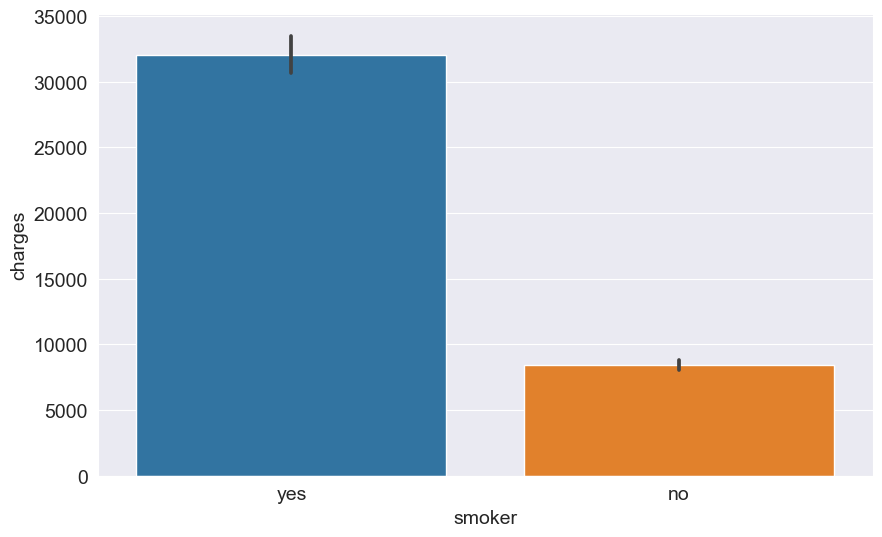

In [105]:
sns.barplot(data = medical_df, x='smoker', y='charges');

In [106]:
smoker_values = {'no':0, 'yes':1}
medical_df['smoker_code'] = medical_df.smoker.map(smoker_values)

In [107]:
medical_df.head()

,age,sex,bmi,children,smoker,region,charges,smoker_code
0,19,female,27.900,0,yes,southwest,16884.92400,1
1,18,male,33.770,1,no,southeast,1725.55230,0
2,28,male,33.000,3,no,southeast,4449.46200,0
3,33,male,22.705,0,no,northwest,21984.47061,0
4,32,male,28.880,0,no,northwest,3866.85520,0


In [108]:
medical_df.charges.corr(medical_df.smoker_code)

0.7872514304984767

In [109]:
# Create inputs and targets
inputs, targets = medical_df[['age', 'bmi', 'children', 'smoker_code']], medical_df['charges']

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evalute the model
loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 6056.439217188079


This decrease in loss is expected  as there is high correlation between charges and smoker_code 

#### 2. Sex

<AxesSubplot:xlabel='sex', ylabel='charges'>

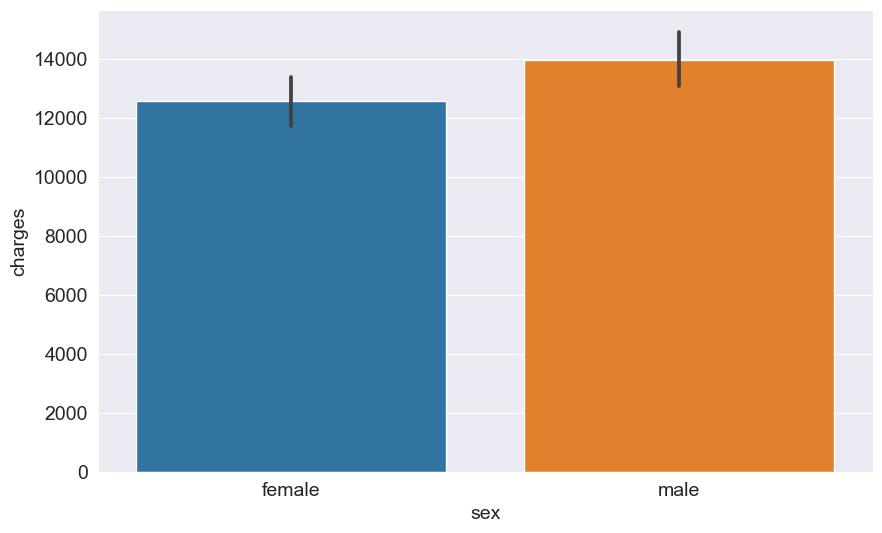

In [117]:
sns.barplot(data=medical_df, x='sex',y='charges')

In [110]:
sex_code = {'male':1, 'female':0}
medical_df['sex_code'] = medical_df.sex.map(sex_code)

In [111]:
medical_df.head()

,age,sex,bmi,children,smoker,region,charges,smoker_code,sex_code
0,19,female,27.900,0,yes,southwest,16884.92400,1,0
1,18,male,33.770,1,no,southeast,1725.55230,0,1
2,28,male,33.000,3,no,southeast,4449.46200,0,1
3,33,male,22.705,0,no,northwest,21984.47061,0,1
4,32,male,28.880,0,no,northwest,3866.85520,0,1


In [112]:
medical_df.charges.corr(medical_df.sex_code)

0.057292062202025366

In [113]:
# Create inputs and targets
inputs, targets = medical_df[['age', 'bmi', 'children', 'smoker_code', 'sex_code']], medical_df['charges']

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evalute the model
loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 6056.100708754539


As expected, no significant decrease in loss after taking sex into picture


### One-hot Encoding

The "region" column contains 4 values, so we'll need to use hot encoding and create a new column for each region.

![](https://i.imgur.com/n8GuiOO.png)

#### 3. Region

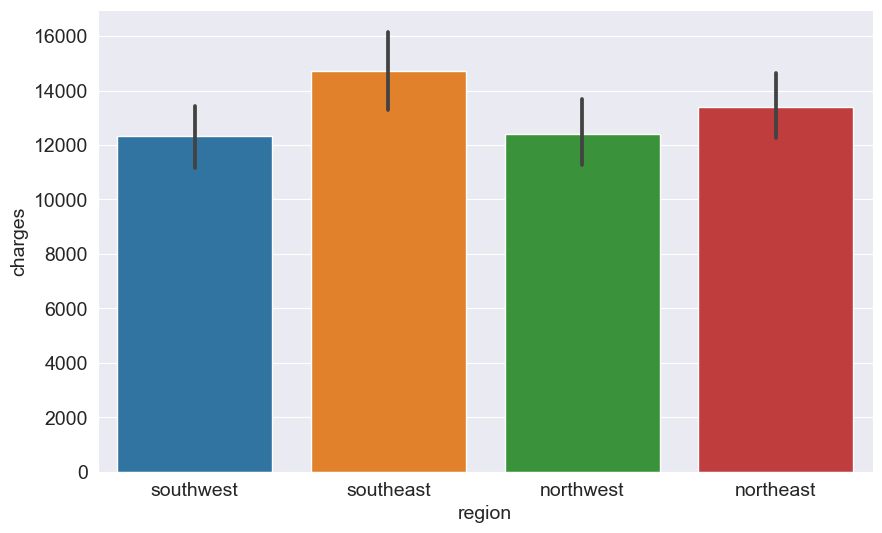

In [120]:
sns.barplot(data=medical_df, x='region', y='charges');

In [121]:
from sklearn import preprocessing
enc = preprocessing.OneHotEncoder()
enc.fit(medical_df[['region']])
enc.categories_

[array(['northeast', 'northwest', 'southeast', 'southwest'], dtype=object)]

In [122]:
one_hot = enc.transform(medical_df[['region']]).toarray()
one_hot

array([[0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.]])

In [123]:
medical_df[['northeast', 'northwest', 'southeast', 'southwest']] = one_hot

In [124]:
medical_df.head()

,age,sex,bmi,children,smoker,region,charges,smoker_code,sex_code,northeast,northwest,southeast,southwest
0,19,female,27.900,0,yes,southwest,16884.92400,1,0,0.0,0.0,0.0,1.0
1,18,male,33.770,1,no,southeast,1725.55230,0,1,0.0,0.0,1.0,0.0
2,28,male,33.000,3,no,southeast,4449.46200,0,1,0.0,0.0,1.0,0.0
3,33,male,22.705,0,no,northwest,21984.47061,0,1,0.0,1.0,0.0,0.0
4,32,male,28.880,0,no,northwest,3866.85520,0,1,0.0,1.0,0.0,0.0


In [137]:
# Create inputs and targets
input_cols = ['age', 'bmi', 'children', 'smoker_code', 'sex_code', 'northeast', 'northwest', 'southeast', 'southwest']
inputs, targets = medical_df[input_cols], medical_df['charges']

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evalute the model
loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 6041.679651174455


#### Trying with smoker and non-smoker separately

In [126]:
# Create inputs and targets
input_cols = ['age', 'bmi', 'children', 'sex_code', 'northeast', 'northwest', 'southeast', 'southwest']
inputs, targets = medical_df[input_cols], medical_df['charges']

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evalute the model
loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 11314.445273509093


This was without taking smoker_code at all

In [134]:
smoker_df = medical_df[medical_df.smoker=='yes']
print(smoker_df.shape)
non_smoker_df = medical_df[medical_df.smoker=='no']
print(non_smoker_df.shape)

(274, 13)
(1064, 13)


In [130]:
# Create inputs and targets
input_cols = ['age', 'bmi', 'children', 'sex_code', 'northeast', 'northwest', 'southeast', 'southwest']
inputs, targets = non_smoker_df[input_cols], non_smoker_df['charges']

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evalute the model
loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 4573.074988795491


In [131]:
# Create inputs and targets
input_cols = ['age', 'bmi', 'children', 'sex_code', 'northeast', 'northwest', 'southeast', 'southwest']
inputs, targets = smoker_df[input_cols], smoker_df['charges']

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evalute the model
loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 5668.467882112153


We see that non_smoker_df gives lesser loss value and thus we can say that it has better predictions on using a linear regression model. It could be due to the following reasons:
   <br> 1. More data is available for non_smoker
    <br>2. The data fits better in a line than smoker_df

## Model Improvements

Let's discuss and apply some more improvements to our model.

### Feature Scaling

Recall that due to regulatory requirements, we also need to explain the rationale behind the predictions our model. 

$charges = w_1 \times age + w_2 \times bmi + w_3 \times children + w_4 \times smoker + w_5 \times sex + w_6 \times region + b$

To compare the importance of each feature in the model, our first instinct might be to compare their weights. 

In [138]:
model.coef_

array([  256.85635254,   339.19345361,   475.50054515, 23848.53454191,
        -131.3143594 ,   587.00923503,   234.0453356 ,  -448.01281436,
        -373.04175627])

In [139]:
model.intercept_

-12525.547811195444

In [140]:
weights_df = pd.DataFrame({'feature':np.append(input_cols,1), 'weight': np.append(model.coef_, model.intercept_)})
weights_df

,feature,weight
0,age,256.856353
1,bmi,339.193454
2,children,475.500545
3,smoker_code,23848.534542
4,sex_code,-131.314359
5,northeast,587.009235
6,northwest,234.045336
7,southeast,-448.012814
8,southwest,-373.041756
9,1,-12525.547811


While it seems like BMI and the "northeast" have a higher weight than age, keep in mind that the range of values for BMI is limited (15 to 40) and the "northeast" column only takes the values 0 and 1.

Because different columns have different ranges, we run into two issues:

1. We can't compare the weights of different column to identify which features are important
2. A column with a larger range of inputs may disproportionately affect the loss and dominate the optimization process.

For this reason, it's common practice to scale (or standardize) the values in numeric column by subtracting the mean and dividing by the standard deviation.

![](https://i.imgur.com/dT5fLFI.png)

We can apply scaling using the StandardScaler class from `scikit-learn`.

In [141]:
from sklearn.preprocessing import StandardScaler

In [142]:
numerical_cols = ['age', 'bmi', 'children']
scaler = StandardScaler()
scaler.fit(medical_df[numerical_cols])

StandardScaler()

In [143]:
print(scaler.mean_)
print(scaler.var_)

[39.20702541 30.66339686  1.09491779]
[197.25385199  37.16008997   1.45212664]


In [144]:
scaled_inputs = scaler.transform(medical_df[numerical_cols])
scaled_inputs

array([[-1.43876426, -0.45332   , -0.90861367],
       [-1.50996545,  0.5096211 , -0.07876719],
       [-0.79795355,  0.38330685,  1.58092576],
       ...,
       [-1.50996545,  1.0148781 , -0.90861367],
       [-1.29636188, -0.79781341, -0.90861367],
       [ 1.55168573, -0.26138796, -0.90861367]])

In [145]:
cat_cols = ['smoker_code', 'sex_code', 'northeast', 'northwest', 'southeast', 'southwest']
categorical_data = medical_df[cat_cols].values

In [146]:
inputs = np.concatenate((scaled_inputs, categorical_data), axis=1)
targets = medical_df.charges

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evalute the model
loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 6041.679651174453


In [148]:
weights_df = pd.DataFrame({
    'feature': np.append(numerical_cols + cat_cols, 1),
    'weight': np.append(model.coef_, model.intercept_)
})
weights_df.sort_values('weight', ascending=False)

,feature,weight
3,smoker_code,23848.534542
9,1,8466.483215
0,age,3607.472736
1,bmi,2067.691966
5,northeast,587.009235
2,children,572.998210
6,northwest,234.045336
4,sex_code,-131.314359
8,southwest,-373.041756
7,southeast,-448.012814


As you can see now, the most important feature are:

1. Smoker
2. Age
3. BMI

### How to Approach a Machine Learning Problem

Here's a strategy you can apply to approach any machine learning problem:

1. Explore the data and find correlations between inputs and targets
2. Pick the right model, loss functions and optimizer for the problem at hand
3. Scale numeric variables and one-hot encode categorical data
4. Set aside a test set (using a fraction of the training set)
5. Train the model
6. Make predictions on the test set and compute the loss